In [1]:
#第一步
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [97]:
#第二步
df = pd.read_csv("B0018.csv")
df.head()

,循环次数,平均放电电压,平均放电温度,等压降放电时间（3.8V-3.5V）,容量
0,1,3.527546,31.773285,1559.375,1.855005
1,2,3.534836,31.924892,1581.110,1.843196
2,3,3.538247,31.316913,1582.438,1.839602
3,4,3.537698,30.821191,1572.984,1.830674
4,5,3.542668,31.953470,1592.500,1.832700


In [126]:
capacity_original_half = np.array(df)[:20,4]


In [127]:
capacity_original_half 

array([1.85500452, 1.84319553, 1.83960184, 1.8306736 , 1.83270021,
       1.82852889, 1.82120119, 1.81517001, 1.80429805, 1.82310023,
       1.81212535, 1.80469164, 1.79084435, 1.78347072, 1.78093861,
       1.77120904, 1.7686304 , 1.75363048, 1.74621974, 1.73766473])

In [128]:
df.shape

(132, 5)

In [129]:
#第三步
df_for_training=df[:120]
df_for_testing= df[0:]

In [130]:
#第四步
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaler = scaler.fit_transform(df_for_training)
df_for_testing_scaler=scaler.fit_transform(df_for_testing)
df_for_testing_scaler[:]

array([[0.00000000e+00, 8.05912498e-01, 8.69909414e-01, 9.53971230e-01,
        1.00000000e+00],
       [7.63358779e-03, 8.76764384e-01, 9.48854233e-01, 9.82605820e-01,
        9.77023216e-01],
       [1.52671756e-02, 9.09919219e-01, 6.32266003e-01, 9.84355382e-01,
        9.70030963e-01],
       [2.29007634e-02, 9.04586376e-01, 3.74132354e-01, 9.71900291e-01,
        9.52659264e-01],
       [3.05343511e-02, 9.52891065e-01, 9.63735509e-01, 9.97611479e-01,
        9.56602431e-01],
       [3.81679389e-02, 9.76570030e-01, 1.00000000e+00, 1.00000000e+00,
        9.48486278e-01],
       [4.58015267e-02, 1.00000000e+00, 7.97658061e-01, 9.71448408e-01,
        9.34228761e-01],
       [5.34351145e-02, 9.73738628e-01, 6.17311941e-01, 9.57346515e-01,
        9.22493878e-01],
       [6.10687023e-02, 9.60768301e-01, 5.25159568e-01, 9.55268910e-01,
        9.01340276e-01],
       [6.87022901e-02, 9.57416679e-01, 5.35805807e-01, 9.78981539e-01,
        9.37923728e-01],
       [7.63358779e-02, 9.7706

In [131]:
df_for_testing_scaler.shape

(132, 5)

In [132]:
#第五步
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past,len(dataset)):
        dataX.append(dataset[i-n_past:i,0:dataset.shape[1]])
        dataY.append(dataset[i,4])
    return np.array(dataX),np.array(dataY)

trainX,trainY = createXY(df_for_training_scaler,20)
testX,testY = createXY(df_for_testing_scaler,20)

In [133]:
trainX.shape

(100, 20, 5)

In [134]:
trainY.shape

(100,)

In [135]:
trainX[2]

array([[0.01680672, 0.90991922, 0.632266  , 0.98435538, 0.96972587],
       [0.02521008, 0.90458638, 0.37413235, 0.97190029, 0.95217732],
       [0.03361345, 0.95289107, 0.96373551, 0.99761148, 0.95616063],
       [0.04201681, 0.97657003, 1.        , 1.        , 0.94796186],
       [0.05042017, 1.        , 0.79765806, 0.97144841, 0.93355919],
       [0.05882353, 0.97373863, 0.61731194, 0.95734651, 0.92170485],
       [0.06722689, 0.9607683 , 0.52515957, 0.95526891, 0.9003359 ],
       [0.07563025, 0.95741668, 0.53580581, 0.97898154, 0.93729178],
       [0.08403361, 0.97706976, 0.73440308, 0.96553968, 0.91572054],
       [0.09243697, 0.97587636, 0.62920044, 0.94964739, 0.90110949],
       [0.10084034, 0.96670902, 0.41202739, 0.92031455, 0.8738925 ],
       [0.1092437 , 0.93976435, 0.2280219 , 0.90316673, 0.85939956],
       [0.11764706, 0.93860643, 0.37645969, 0.91197778, 0.85442267],
       [0.12605042, 0.93916514, 0.70229685, 0.90129465, 0.83529909],
       [0.13445378, 0.95367148, 0.

In [136]:
trainY[1]

0.7122305106822115

learning_rate = 0.01
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(SimpleRNN(activation='tanh',units =50,return_sequences=False,input_shape=(20,5)))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss='mse',optimizer=optimizer)


    grid_model = KerasRegressor(build_fn=build_model,verbose=1)
    return grid_model

parameters = {'batch_size':[16,24,28,32,40],
             'epochs':[300,500,800],
             'optimizer':['adam']}

grid_search = GridSearchCV(estimator= grid_model,
                          param_grid = parameters,
                          cv=2)
    

In [137]:
#第六步 RNN模型构建
model = Sequential()
model.add(SimpleRNN(units=50,activation='tanh',input_shape=(20,5)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [138]:
#grid_search =grid_search.fit(trainX,trainY)

In [139]:
#grid_search.best_params_


In [140]:
#my_model = grid_search.best_estimator_.model

In [141]:
#prediction = my_model.predict(testX)
#print("prediction\n",prediction)
#print("\nPrediction Shape-",prediction.shape)

In [142]:
#第七步
model.fit(trainX,trainY,epochs=300,batch_size=28,validation_data = (testX, testY))

Epoch 1/300
4/4 [==============================] - 2s 323ms/step - loss: 0.6060 - val_loss: 0.0252
Epoch 2/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0482 - val_loss: 0.1421
Epoch 3/300
4/4 [==============================] - 0s 18ms/step - loss: 0.1305 - val_loss: 0.0745
Epoch 4/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0432 - val_loss: 0.0105
Epoch 5/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0208 - val_loss: 0.0333
Epoch 6/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0370 - val_loss: 0.0227
Epoch 7/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0176 - val_loss: 0.0087
Epoch 8/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0100 - val_loss: 0.0146
Epoch 9/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0156 - val_loss: 0.0145
Epoch 10/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0120 - val_loss: 0.0082
Epoch 11/300
4/4 [

Epoch 84/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 85/300
4/4 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 86/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 87/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 88/300
4/4 [==============================] - 0s 18ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 89/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 90/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 91/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 92/300
4/4 [==============================] - 0s 16ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 93/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 94/3

4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 167/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 168/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 169/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 170/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 171/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 172/300
4/4 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 173/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 174/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 175/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 176/300


Epoch 248/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 249/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 250/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 251/300
4/4 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 252/300
4/4 [==============================] - 0s 17ms/step - loss: 9.5942e-04 - val_loss: 9.5213e-04
Epoch 253/300
4/4 [==============================] - 0s 17ms/step - loss: 9.8603e-04 - val_loss: 0.0012
Epoch 254/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 255/300
4/4 [==============================] - 0s 16ms/step - loss: 9.5631e-04 - val_loss: 9.8223e-04
Epoch 256/300
4/4 [==============================] - 0s 19ms/step - loss: 9.7058e-04 - val_loss: 0.0011
Epoch 257/300
4/4 [==============================] - 0s 17ms/step - loss: 9.

In [143]:
prediction = model.predict(testX)
print("prediction\n",prediction)
print("\nPrediction Shape-",prediction.shape)

4/4 [==============================] - 0s 3ms/step
prediction
 [[0.7262268 ]
 [0.7206795 ]
 [0.71870863]
 [0.76878035]
 [0.776486  ]
 [0.74489576]
 [0.7602204 ]
 [0.71604764]
 [0.69494367]
 [0.67105603]
 [0.6831542 ]
 [0.6546973 ]
 [0.6002373 ]
 [0.61592764]
 [0.6187058 ]
 [0.57579374]
 [0.5782334 ]
 [0.5627684 ]
 [0.5468083 ]
 [0.6005943 ]
 [0.6168755 ]
 [0.572421  ]
 [0.552377  ]
 [0.53615606]
 [0.52530605]
 [0.7009739 ]
 [0.7235755 ]
 [0.7145049 ]
 [0.65925807]
 [0.6266506 ]
 [0.66326946]
 [0.6528938 ]
 [0.58917725]
 [0.54477173]
 [0.5208012 ]
 [0.6443016 ]
 [0.55281043]
 [0.5289118 ]
 [0.542173  ]
 [0.48776662]
 [0.4869236 ]
 [0.469152  ]
 [0.39460248]
 [0.38369203]
 [0.41069922]
 [0.40774634]
 [0.35383418]
 [0.31148443]
 [0.3150859 ]
 [0.3445005 ]
 [0.35431102]
 [0.34858143]
 [0.32370153]
 [0.26058584]
 [0.25031865]
 [0.25766718]
 [0.26133427]
 [0.23936087]
 [0.22380422]
 [0.23414347]
 [0.22927871]
 [0.2224401 ]
 [0.2028578 ]
 [0.19795936]
 [0.19780554]
 [0.20482446]
 [0.20412816]

In [144]:
#第八步
prediction_copy = np.repeat(prediction,5,axis= -1)
pred = scaler.inverse_transform(np.reshape(prediction_copy,(len(prediction),5)))[:,4]

In [145]:
pred.shape


(112,)

In [146]:
original_copy = np.repeat(testY,5,axis=-1)
original = scaler.inverse_transform(np.reshape(original_copy,(len(testY),5)))[:,4]

In [147]:
print("Pred Values-",pred)
print("\nOriginal Valuse_",original)

Pred Values- [1.714298  1.7114469 1.710434  1.7361684 1.7401288 1.7238929 1.7317691
 1.7090663 1.6982199 1.6859428 1.6921606 1.677535  1.6495453 1.6576095
 1.6590372 1.6369824 1.6382364 1.630288  1.6220852 1.6497288 1.6580964
 1.635249  1.6249473 1.6166104 1.6110342 1.7013192 1.7129352 1.7082735
 1.6798792 1.6631205 1.6819409 1.6766082 1.6438608 1.6210386 1.6087188
 1.6721923 1.6251701 1.6128874 1.6197029 1.5917406 1.5913073 1.5821736
 1.5438586 1.5382512 1.5521315 1.550614  1.5229056 1.5011398 1.5029908
 1.5181086 1.5231507 1.5202059 1.5074188 1.4749804 1.4697034 1.4734802
 1.4753649 1.4640718 1.4560764 1.4613903 1.4588898 1.4553752 1.4453108
 1.4427934 1.4427142 1.4463216 1.4459637 1.4363061 1.434639  1.425257
 1.4424796 1.4349173 1.4341903 1.4221795 1.4106911 1.406731  1.4040036
 1.3951023 1.4021183 1.399961  1.3902742 1.393273  1.3749717 1.3798444
 1.3783263 1.3752426 1.4380102 1.4276569 1.4167434 1.4110297 1.415086
 1.4026788 1.392736  1.3714533 1.3770263 1.3964033 1.3867412 1.377

In [148]:
capacity_original_complete =np.append(capacity_original_half,original)
pred_complete = np.append(capacity_original_half,pred)

In [149]:
print(capacity_original_complete.shape)
print(pred_complete.shape)

(132,)
(132,)


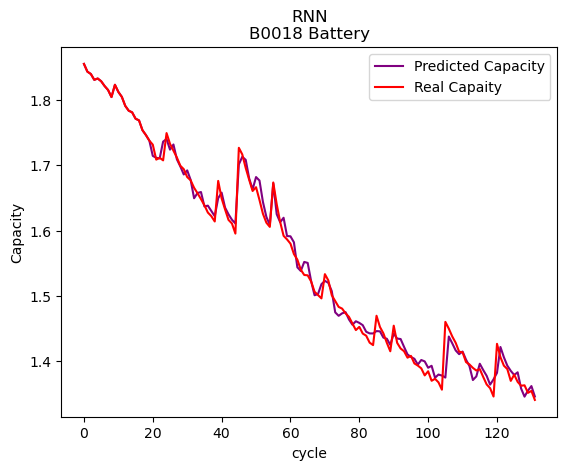

In [150]:
#第九步
plt.plot(pred_complete,color = 'purple',label = 'Predicted Capacity')
plt.plot(capacity_original_complete,color= 'red',label = 'Real Capaity')
plt.title('RNN\nB0018 Battery')
plt.xlabel('cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()


In [151]:
#第十步
print("mean_absolute_error MAE:", mean_absolute_error(original, pred))
print("mean_squared_error MSE:", mean_squared_error(original, pred))
print("rmse:", sqrt(mean_squared_error(original, pred)))
print("r2 score:", r2_score(original, pred))

mean_absolute_error MAE: 0.010860438749469766
mean_squared_error MSE: 0.00022989173128465257
rmse: 0.015162180954092738
r2 score: 0.9849610046795264


预测起点80

In [152]:
df_cycle_past = df.iloc[59:79,:]

In [30]:
df_cycle_feature = pd.read_csv("B5_test.csv")

In [31]:
df_cycle_feature["容量"]=0

剔除预测数据中容量列，归一化缩放，拼接20个预测输入和88个test点

In [32]:

old_scaled_array = scaler.transform(df_cycle_past)
new_scaled_array = scaler.transform(df_cycle_feature)
new_scaled_df = pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,4] = np.nan
full_df = pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)
                     

滚动填充容量数据预测

In [33]:
full_df_scaled_array = full_df.values
all_data=[]
time_step=20
for i in range (time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction = model.predict(data_x)
    print(prediction)
    all_data.append(prediction)
    full_df.iloc[i,4] = prediction

1/1 [==============================] - 0s 26ms/step
[[0.458049]]
1/1 [==============================] - 0s 30ms/step
[[0.42768824]]
1/1 [==============================] - 0s 26ms/step
[[0.42393577]]
1/1 [==============================] - 0s 25ms/step
[[0.41763568]]
1/1 [==============================] - 0s 31ms/step
[[0.34674627]]
1/1 [==============================] - 0s 40ms/step
[[0.31907523]]
1/1 [==============================] - 0s 26ms/step
[[0.32951173]]
1/1 [==============================] - 0s 29ms/step
[[0.31117886]]
1/1 [==============================] - 0s 28ms/step
[[0.31507128]]
1/1 [==============================] - 0s 30ms/step
[[0.33481103]]
1/1 [==============================] - 0s 25ms/step
[[0.39491674]]
1/1 [==============================] - 0s 34ms/step
[[0.3580164]]
1/1 [==============================] - 0s 33ms/step
[[0.27891287]]
1/1 [==============================] - 0s 26ms/step
[[0.28334686]]
1/1 [==============================] - 0s 28ms/step
[[0.3334458]]

In [34]:
#逆缩放
new_array = np.array(all_data)
new_array = new_array.reshape(-1,1)
prediction_copy_array =np.repeat(new_array,5,axis=-1)
y_pred_future_cycle = scaler.inverse_transform(np.reshape(prediction_copy_array,(len(new_array),5)))[:,4]
print(y_pred_future_cycle)

[1.5480983 1.530822  1.5286868 1.5251018 1.4847633 1.4690175 1.4749563
 1.4645241 1.466739  1.4779718 1.5121739 1.4911764 1.4461638 1.4486867
 1.4771948 1.4644817 1.4352974 1.4369483 1.4380864 1.4272156 1.4089813
 1.3956025 1.4207263 1.4253777 1.401347  1.3948543 1.3841151 1.3791305
 1.3771442 1.3629453 1.3669212 1.3782302 1.3661865 1.3326379 1.3087313
 1.3437158 1.3476346 1.323738  1.3132613 1.3239386 1.3351233 1.3381729
 1.3276716 1.3122369 1.3218747 1.3470393 1.33337   1.328309  1.3390459
 1.3298025 1.3136942 1.300364  1.3287061 1.3557732 1.3489658 1.3276379
 1.3065497 1.3106868 1.3320867 1.3368027 1.3192195 1.3135889 1.3011918
 1.280319  1.2887927 1.3164762 1.3135223 1.3094877 1.3087317 1.3131531
 1.3095108 1.3328865 1.3578055 1.3326864 1.3302146 1.3642012 1.3470913
 1.3207297 1.3362516 1.3624378 1.3465482 1.3094499 1.3235158 1.3391329
 1.3193122 1.3226758 1.3422449 1.3464456]


In [35]:
capacity_original_half = np.array(df)[:80,4]
capacity_original_complete = np.array(df)[:,4]
len(capacity_original_half)

80

In [36]:
pred_complete = np.append(capacity_original_half,y_pred_future_cycle)

In [37]:
len(pred_complete)

168

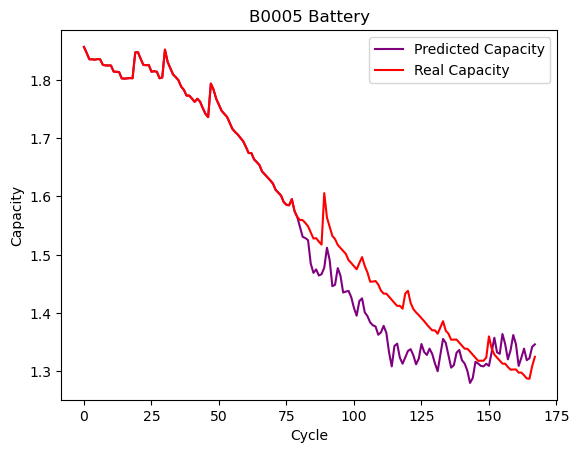

In [38]:
plt.plot(pred_complete,color = 'purple',label = 'Predicted Capacity')
plt.plot(capacity_original_complete,color = 'red',label = 'Real Capacity')
plt.title('B0005 Battery')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.show()

In [39]:
print("mean_absolute_error MAE:", mean_absolute_error(capacity_original_complete, pred_complete))
print("mean_squared_error MSE:", mean_squared_error(capacity_original_complete, pred_complete))
print("rmse:", sqrt(mean_squared_error(capacity_original_complete, pred_complete)))
print("r2 score:", r2_score(capacity_original_complete, pred_complete))

mean_absolute_error MAE: 0.026699676381892974
mean_squared_error MSE: 0.0017546883890784213
rmse: 0.041889000812604986
r2 score: 0.9513143843204184
